Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты
Требуется выполнить следующее задание:
# Задание Баллы
1 Загрузите файл HR.csv в pandas dataframe 5
2 Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).
10
3 Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.
10
4 Рассчитайте сколько сотрудников работает в каждом
департаменте.
5
5 Показать распределение сотрудников по зарплатам. 5
6 Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности
5
7 Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом
10
8 Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов
10
9 Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки
20
10 Загрузить jupyter notebook с решение на github и прислать ссылку 5
Итого - максимум 85 баллов

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv('HR.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [6]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

Я так и не поняла нужно ли преобразовывать эти данные или нет

In [7]:
statistics = df.describe()
mode = df.mode()

# Добавляем строку с модой к статистикам
statistics.loc['mode'] = mode.iloc[0]

In [8]:
statistics.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000
mode,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000


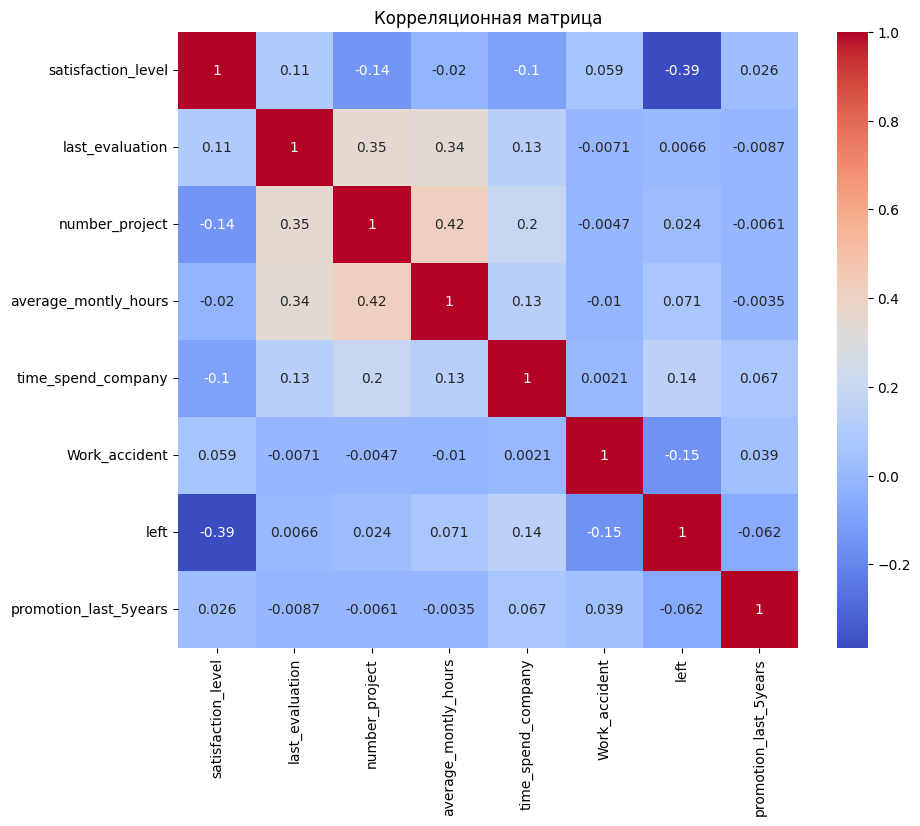

In [9]:
numerical_variables = df.select_dtypes(include=['float64', 'int64'])

# Рассчитываем корреляционную матрицу
correlation_matrix = numerical_variables.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()

Наиболее скоррелированне переменные: average_montly_hours и number_project - положительно, а так же удовлетворенность работой и уход - отрицательно. Наименьшая корреляция между Work_accident и time_spend_company, а так же average_montly_hours и повышением.

In [61]:
employee_count_by_department = df['department'].value_counts()
employee_count_by_department

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [45]:
salary_distribution = df['salary'].value_counts()
salary_distribution

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

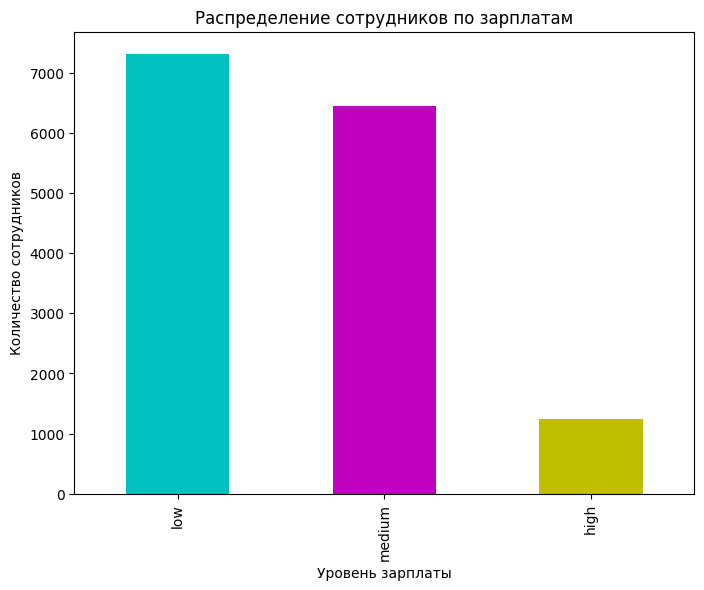

In [46]:
salary_distribution.plot(kind='bar', figsize=(8, 6), color=['c', 'm', 'y'])
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.show()

In [10]:
salary_distribution_by_department = df.groupby('department')['salary'].value_counts().unstack()
salary_distribution_by_department

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


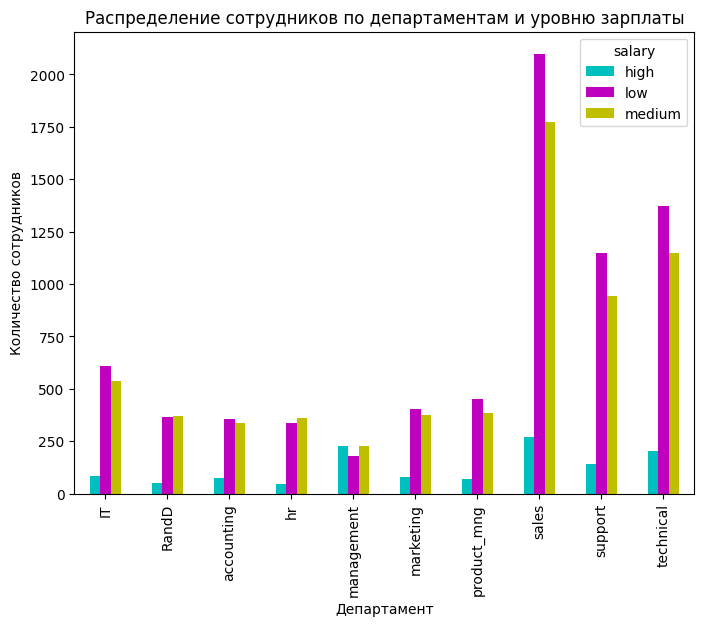

In [47]:
salary_distribution_by_department.plot(kind='bar', figsize=(8, 6), color=['c', 'm', 'y'])
plt.title('Распределение сотрудников по департаментам и уровню зарплаты')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.show()

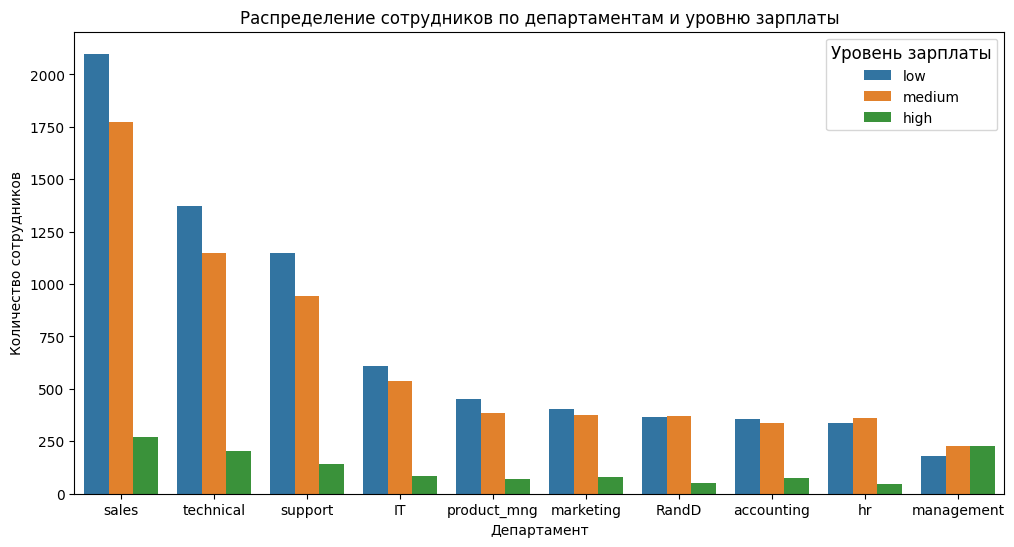

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(x='department', hue='salary', data=df, order=df['department'].value_counts().index)
plt.title('Распределение сотрудников по департаментам и уровню зарплаты')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.legend(title='Уровень зарплаты', title_fontsize='12')
plt.show()

In [13]:
from scipy import stats

# Выбираем данные для сотрудников с высоким и низким окладом
high_salary_hours = df[df['salary'] == 'high']['average_montly_hours']
low_salary_hours = df[df['salary'] == 'low']['average_montly_hours']

# Проводим t-тест
t_statistic, p_value = stats.ttest_ind(high_salary_hours, low_salary_hours)

print(f'T-статистика: {t_statistic}')
print(f'p-значение: {p_value}')

# Уровень значимости
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: есть статистически значимые различия.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: статистически значимых различий нет.")

T-статистика: -0.7288680398062308
p-значение: 0.4661023478267259
Не удалось отвергнуть нулевую гипотезу: статистически значимых различий нет.


In [14]:
# Группировка данных по статусу увольнения (уволился/не уволился)
grouped_data = df.groupby('left')

# Доля сотрудников с повышением за последние 5 лет
promotion_rate = grouped_data['promotion_last_5years'].mean()

# Средняя степень удовлетворенности
satisfaction_mean = grouped_data['satisfaction_level'].mean()

# Среднее количество проектов
projects_mean = grouped_data['number_project'].mean()

# Вывод результатов
print("Доля сотрудников с повышением за последние 5 лет:")
print(promotion_rate)

print("\nСредняя степень удовлетворенности:")
print(satisfaction_mean)

print("\nСреднее количество проектов:")
print(projects_mean)

Доля сотрудников с повышением за последние 5 лет:
left
0    0.026251
1    0.005321
Name: promotion_last_5years, dtype: float64

Средняя степень удовлетворенности:
left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

Среднее количество проектов:
left
0    3.786664
1    3.855503
Name: number_project, dtype: float64


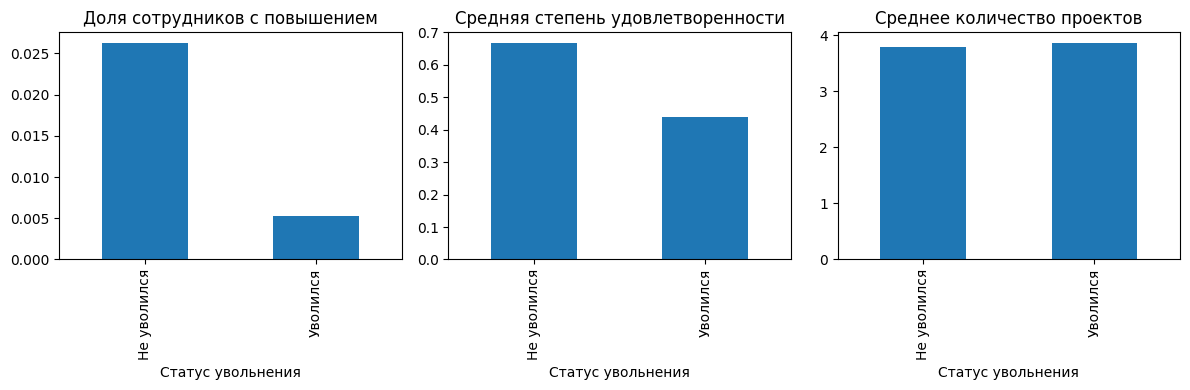

In [19]:
# Создание графиков
plt.figure(figsize=(12, 4))

# График для доли сотрудников с повышением
plt.subplot(131)
promotion_rate.plot(kind='bar')
plt.title('Доля сотрудников с повышением')
plt.xlabel('Статус увольнения')
plt.xticks([0, 1], ['Не уволился', 'Уволился'])

# График для средней степени удовлетворенности
plt.subplot(132)
satisfaction_mean.plot(kind='bar')
plt.title('Средняя степень удовлетворенности')
plt.xlabel('Статус увольнения')
plt.xticks([0, 1], ['Не уволился', 'Уволился'])

# График для среднего количества проектов
plt.subplot(133)
projects_mean.plot(kind='bar')
plt.title('Среднее количество проектов')
plt.xlabel('Статус увольнения')
plt.xticks([0, 1], ['Не уволился', 'Уволился'])

plt.tight_layout()
plt.show()

In [21]:
# Выборка признаков (исключаем 'department' и 'salary')
X = df.drop(['left', 'department', 'salary'], axis=1)

# Целевая переменная (статус увольнения)
y = df['left']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение модели LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = lda.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f"Точность модели: {accuracy}")
print("Матрица ошибок:")
print(conf_matrix)
print("Отчет о классификации:")
print(classification_rep)

Точность модели: 0.7533333333333333
Матрица ошибок:
[[2094  200]
 [ 540  166]]
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2294
           1       0.45      0.24      0.31       706

    accuracy                           0.75      3000
   macro avg       0.62      0.57      0.58      3000
weighted avg       0.71      0.75      0.72      3000



In [27]:
result = pd.DataFrame({'Факт': y_test, 'Прогноз': y_pred})

# Добавляем столбец с разницей между фактом и прогнозом
result['Разница'] = result['Факт'] - result['Прогноз']

# Выводим результаты
print(result)

       Факт  Прогноз  Разница
6723      0        0        0
6473      0        0        0
4679      0        0        0
862       1        0        1
7286      0        0        0
...     ...      ...      ...
3297      0        0        0
14113     0        0        0
5514      0        0        0
9939      0        0        0
14346     1        0        1

[3000 rows x 3 columns]


In [28]:
# Рассчитываем количество ошибок
errors = (result['Разница'] != 0).sum()

# Выводим количество ошибок
print(f"Количество ошибок: {errors}")

Количество ошибок: 740


In [ ]:
#Попытки преобразовать данные
var_categorical = ['department', 'salary']
data = pd.get_dummies(df, columns=var_categorical)
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
#Попытки преобразовать данные
statistics1 = data.describe()
mode1 = data.mode()

# Добавляем строку с модой к статистикам
statistics1.loc['mode1'] = mode1.iloc[0]
statistics1.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,...,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.081805,0.052470,...,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345,0.082472,0.487766,0.429762
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.274077,0.222981,...,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317,0.275092,0.499867,0.495059
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mode1,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


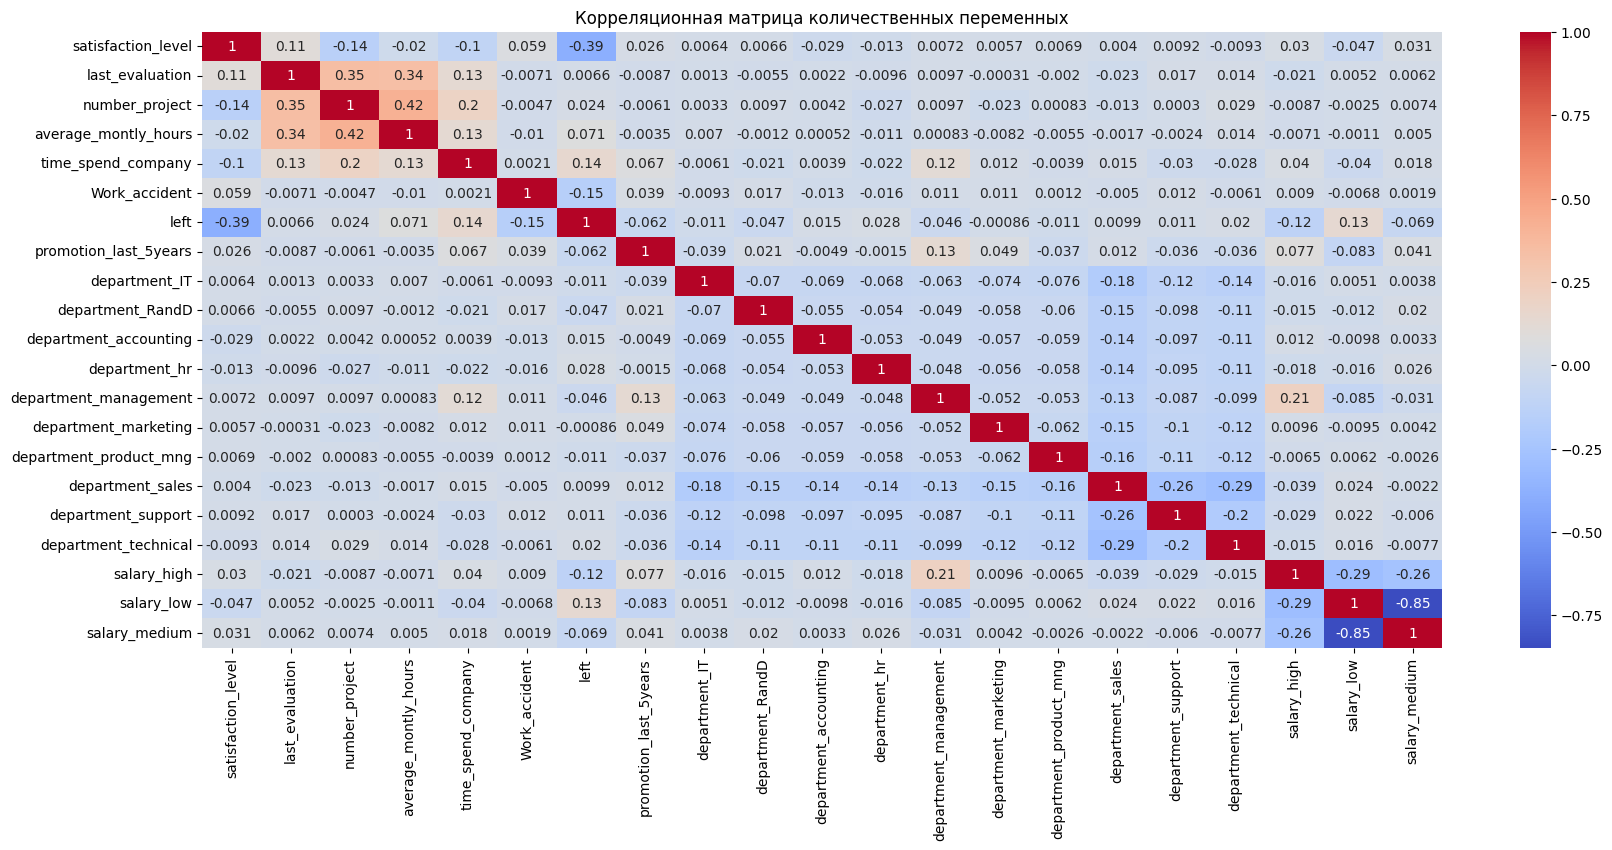

In [45]:
# Рассчитываем корреляционную матрицу
correlation_matrix = data.corr()

# Визуализируем корреляционную матрицу с использованием heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Корреляционная матрица количественных переменных")
plt.show()